In [1]:
import pandas as pd
import numpy as np
# import dask.dataframe as dd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [2]:
pd.set_option('display.max_columns', None)

train = pd.read_csv('train_data.csv', low_memory=False)

In [3]:
# # Reading test and validation dataset to transform categorical values on those as well
# test = pd.read_csv('test_data.csv')
# val_set = pd.read_csv('val_set_data.csv')

In [4]:
train.head()

,date,customer_code,employee_index,country,female,age,new_cust,seniority_in_months,cust_type,residency_spain,birth_spain,join_channel,province_name,active_cust,income,segment,savings_acct,guarantees,current_acct,derivada_acct,payroll_acct,junior_acct,mas_particular_acct,particular_acct,particular_plus_acct,short_term_depo,medium_term_depo,long_term_depo,e_acct,funds,mortgage,pension,loans,taxes,credit_card,securities,home_acct,pensions_2,direct_debt,total_products,01 - TOP,02 - PARTICULARES,03 - UNIVERSITARIO,join_channel_encoded,province_name_encoded,employee_index_encoded
0,2015-07-28,664160,N,1,0,0.632653,0,0.402344,1,1,0,KAR,MADRID,0,1.989686,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,False,True,False,1.424185,1.749698,1.407278
1,2016-01-28,1076784,N,1,0,0.214286,0,0.152344,1,1,0,KHE,LERIDA,0,-0.306603,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,False,False,True,0.886876,1.006139,1.407278
2,2015-12-28,672465,N,1,0,0.387755,0,0.417969,1,1,0,KFC,SEVILLA,1,-0.148205,02 - PARTICULARES,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,4,False,True,False,1.559984,1.382030,1.407278
3,2015-10-28,774528,N,1,0,0.397959,0,0.343750,1,1,0,KFA,MURCIA,1,-0.228531,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,False,True,False,1.850124,1.075147,1.407278
4,2016-05-28,569598,N,1,0,0.459184,0,0.496094,1,1,0,KAT,MADRID,1,0.588748,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,False,True,False,1.942077,1.749698,1.407278


In [5]:
train['date'] = pd.to_datetime(train['date'])

In [7]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder on the customer_code column
train['customer_code_encoded'] = label_encoder.fit_transform(train['customer_code'])

# Apply the same encoding to the test and validation set
# test['customer_code_encoded'] = label_encoder.transform(test['customer_code'])
# val_set['customer_code_encoded'] = label_encoder.transform(val_set['customer_code'])

# Display the first few rows in test and val_set to verify the encoding
# print(test[['customer_code', 'customer_code_encoded']].head())
# print(val_set[['customer_code', 'customer_code_encoded']].head())
print(train[['customer_code', 'customer_code_encoded']].head())

   customer_code  customer_code_encoded
0         664160                 263662
1        1076784                 459750
2         672465                 266890
3         774528                 300528
4         569598                 227731


In [8]:
# Convert all boolean columns (True/False) to integers (1/0)
train = train.map(lambda x: int(x) if isinstance(x, bool) else x)
# test = test.map(lambda x: int(x) if isinstance(x, bool) else x)
# val_set = val_set.map(lambda x: int(x) if isinstance(x, bool) else x)

# Display the first few rows to check the changes
print(train.head())
# print(test.head())
# print(val_set.head())

        date  customer_code employee_index  country  female       age  \
0 2015-07-28         664160              N        1       0  0.632653   
1 2016-01-28        1076784              N        1       0  0.214286   
2 2015-12-28         672465              N        1       0  0.387755   
3 2015-10-28         774528              N        1       0  0.397959   
4 2016-05-28         569598              N        1       0  0.459184   

   new_cust  seniority_in_months  cust_type  residency_spain  birth_spain  \
0         0             0.402344          1                1            0   
1         0             0.152344          1                1            0   
2         0             0.417969          1                1            0   
3         0             0.343750          1                1            0   
4         0             0.496094          1                1            0   

  join_channel province_name  active_cust    income             segment  \
0          KAR        M

In [9]:
train = train.rename(columns={'country': 'country_spain'})

In [10]:
df_encoded = train

In [11]:
# List of columns you want to drop
columns_to_drop = ['customer_code', 'employee_index', 'join_channel', 'province_name', 'segment']  

# Drop the columns from the DataFrame
df_encoded = df_encoded.drop(columns=columns_to_drop)

# Display the first few rows to confirm the columns were dropped
df_encoded.head()

,date,country_spain,female,age,new_cust,seniority_in_months,cust_type,residency_spain,birth_spain,active_cust,income,savings_acct,guarantees,current_acct,derivada_acct,payroll_acct,junior_acct,mas_particular_acct,particular_acct,particular_plus_acct,short_term_depo,medium_term_depo,long_term_depo,e_acct,funds,mortgage,pension,loans,taxes,credit_card,securities,home_acct,pensions_2,direct_debt,total_products,01 - TOP,02 - PARTICULARES,03 - UNIVERSITARIO,join_channel_encoded,province_name_encoded,employee_index_encoded,customer_code_encoded
0,2015-07-28,1,0,0.632653,0,0.402344,1,1,0,0,1.989686,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1.424185,1.749698,1.407278,263662
1,2016-01-28,1,0,0.214286,0,0.152344,1,1,0,0,-0.306603,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0.886876,1.006139,1.407278,459750
2,2015-12-28,1,0,0.387755,0,0.417969,1,1,0,1,-0.148205,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,4,0,1,0,1.559984,1.382030,1.407278,266890
3,2015-10-28,1,0,0.397959,0,0.343750,1,1,0,1,-0.228531,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,1,0,1.850124,1.075147,1.407278,300528
4,2016-05-28,1,0,0.459184,0,0.496094,1,1,0,1,0.588748,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1.942077,1.749698,1.407278,227731


# New variables

Customers with higher income relative to the number of products they hold may indicate a propensity for wealth management.

In [12]:
# 1. Income to Product Ratio
df_encoded['income_to_product_ratio'] = df_encoded['income'] / df_encoded['total_products'].replace(0, 1) 
df_encoded['income_to_product_ratio']

0          1.989686
1         -0.306603
2         -0.037051
3         -0.114266
4          0.588748
             ...   
6579712    1.700197
6579713   -0.402519
6579714    0.954580
6579715   -0.010249
6579716   -0.214432
Name: income_to_product_ratio, Length: 6579717, dtype: float64

Income to Age Ratio: This metric helps identify customers who might have high disposable income.

In [13]:
# 2. Income to Age Ratio
df_encoded['income_to_age'] = train['income'] / (df_encoded['age'] + 1e-5)  # Avoid division by zero
df_encoded['income_to_age']

0          3.144938
1         -1.430748
2         -0.382203
3         -0.574243
4          1.282133
             ...   
6579712    2.031918
6579713   -0.730484
6579714    1.670486
6579715   -0.118158
6579716   -0.525345
Name: income_to_age, Length: 6579717, dtype: float64

In [14]:
df_encoded['total_savings'] = (df_encoded['savings_acct'] + df_encoded['short_term_depo'] +
                           df_encoded['medium_term_depo'] + df_encoded['long_term_depo'])

In [15]:
#Create function to calculate the probabiity

def calculate_product_probabilities(df, product_columns):
    product_counts = df_encoded[product_columns].sum()
    
    # Calculate total number of observations
    total_observations = len(df_encoded)
    
    # Calculate probabilities
    product_probabilities = product_counts / total_observations
    
    # Create a DataFrame to return
    probabilities_df = product_probabilities.reset_index()
    probabilities_df.columns = ['Product', 'Probability']

    probabilities_df = probabilities_df.sort_values(by='Probability', ascending=False)
    
    return probabilities_df

In [16]:
product_columns = ['savings_acct', 'guarantees', 'current_acct', 'derivada_acct', 'payroll_acct', 
            'junior_acct', 'mas_particular_acct', 'particular_acct', 'particular_plus_acct', 
            'short_term_depo', 'medium_term_depo', 'long_term_depo', 'e_acct', 'funds', 
            'mortgage', 'pension', 'loans', 'taxes', 'credit_card', 'securities', 
            'home_acct', 'payroll_acct', 'pensions_2', 'direct_debt']

# Call the function with your DataFrame
probabilities = calculate_product_probabilities(df_encoded, product_columns)

# Display the resulting DataFrame
print(probabilities)

                 Product  Probability
2           current_acct     0.618343
23           direct_debt     0.130519
7        particular_acct     0.126079
12                e_acct     0.085384
22            pensions_2     0.061948
4           payroll_acct     0.056727
21          payroll_acct     0.056727
17                 taxes     0.055590
18           credit_card     0.045349
8   particular_plus_acct     0.043026
11        long_term_depo     0.042750
19            securities     0.025600
13                 funds     0.018571
5            junior_acct     0.009495
15               pension     0.009374
6    mas_particular_acct     0.008207
14              mortgage     0.005955
20             home_acct     0.003935
16                 loans     0.002400
10      medium_term_depo     0.001523
9        short_term_depo     0.001260
3          derivada_acct     0.000398
0           savings_acct     0.000102
1             guarantees     0.000023


We will use this as a guidance to recommend the product.

In [17]:
df_encoded.shape

(6579717, 45)

# Feature Engineering

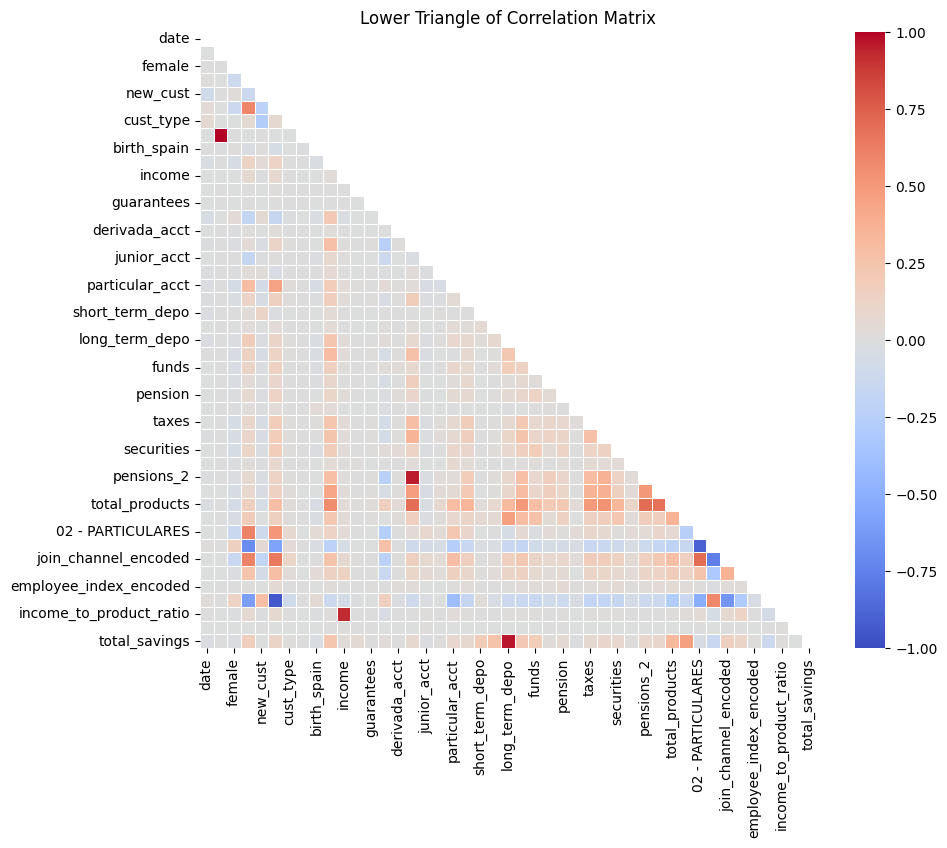

In [18]:
# Compute the correlation matrix
corr = df_encoded.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a seaborn heatmap with the mask for the upper triangle
sns.heatmap(corr, mask=mask, annot=False, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=.5)

# Display the plot
plt.title('Lower Triangle of Correlation Matrix')
plt.show()

Since these are vaguely correlated, it might not help to use PCA for dimension reduction

# PCA 

In [17]:
# # Select numerical features 
# numerical_features = train.select_dtypes(include=['float64', 'int64'])

# # Standardizing the features
# scaler = StandardScaler()
# numerical_features_scaled = scaler.fit_transform(numerical_features)

# # PCA Implementation
# pca = PCA(n_components=0.95)  # Retain 95% of variance
# principal_components = pca.fit_transform(numerical_features_scaled)


In [18]:
# # Create a DataFrame for the PCA components
# pca_columns = [f'pca_{i+1}' for i in range(principal_components.shape[1])]
# train_pca = pd.DataFrame(data=principal_components, columns=pca_columns)


In [19]:
# Combine PCA components back with original DataFrame 
# train_pca1 = pd.concat([train.reset_index(drop=True), train_pca.reset_index(drop=True)], axis=1)
# train.head()

In [20]:
# #print the eigen values
# print("Explained variance ratio of each component:", pca.explained_variance_ratio_)

In [21]:
# plt.figure(figsize=(8, 6))
# plt.scatter(train_pca1['pca_1'], train_pca1['pca_2'], alpha=0.5)
# plt.title('PCA Component 1 vs Component 2')
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
# plt.grid()
# plt.show()

# Feature selection

In [19]:
product_features = df_encoded[product_columns]

In [20]:
user_features = df_encoded.drop(columns=product_columns)
user_features.drop('date', axis=1, inplace=True)

In [21]:
print("User Features Shape: ", user_features.shape)
print("Product Features Shape: ", product_features.shape)

User Features Shape:  (6579717, 21)
Product Features Shape:  (6579717, 24)


In [22]:
X = user_features
y = product_features

In [23]:
# Store feature importances for all products
feature_importances = pd.DataFrame(index=X.columns)

for product in y.columns:
    X_train, X_test, y_train, y_test = train_test_split(X, y[product], test_size=0.2, random_state=42)
    
    # RF with parallel processing
    rf = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    # Store feature importances for the current product
    feature_importances[product] = rf.feature_importances_

# Print top features for each product
for product in feature_importances.columns:
    print(f"Top features for {product}:")
    top_features = feature_importances[product].sort_values(ascending=False).head(10)
    print(top_features)
    print("\n")

Top features for savings_acct:
income                     0.150026
customer_code_encoded      0.145615
income_to_product_ratio    0.134967
active_cust                0.131859
income_to_age              0.122386
age                        0.059167
seniority_in_months        0.056159
total_products             0.051564
province_name_encoded      0.043833
total_savings              0.038495
Name: savings_acct, dtype: float64


Top features for guarantees:
income                     0.219881
customer_code_encoded      0.204270
income_to_product_ratio    0.183386
income_to_age              0.177039
seniority_in_months        0.056700
age                        0.055959
total_products             0.041000
female                     0.015331
join_channel_encoded       0.015092
total_savings              0.013095
Name: guarantees, dtype: float64


Top features for current_acct:
total_products             0.481619
customer_code_encoded      0.074443
age                        0.064783
income_to